In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import os
import matplotlib.dates as mdates
import datetime
%matplotlib inline

In [2]:
df = pd.read_excel("./파이널프로젝트_RAW_210329_210926.xlsx")

In [3]:
## 결측치 처리
df['course_id'].replace('', np.nan, inplace=True)
df['coupon_title'].fillna('사용안함', inplace=True)
df['coupon_discount_amount'].fillna(0.0,inplace=True)
df['sale_price'].replace('', np.nan, inplace=True)
del df['tax_free_amount']
df['pg'].fillna('ETC', inplace=True)
df['subcategory_title'].fillna('해당없음', inplace=True)

df.drop(index=47361, axis=0, inplace=True)
df.dropna(subset=['course_id'], inplace=True)
df.dropna(subset=['sale_price'],inplace=True)

In [4]:
## 필요없는 데이터 처리
df = df[df['state']=='COMPLETED']
df = df[(df['type']=='REFUND')|(df['type']=='PAYMENT')]

In [5]:
df.reset_index(drop=True, inplace=True) # 결측치 처리된 원본 데이터 인덱스 재정렬

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53490 entries, 0 to 53489
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      53490 non-null  int64         
 1   customer_id             53490 non-null  float64       
 2   course_id               53490 non-null  float64       
 3   type                    53490 non-null  object        
 4   state                   53490 non-null  object        
 5   course_title            53490 non-null  object        
 6   category_title          53490 non-null  object        
 7   format                  53490 non-null  object        
 8   completed_at            53490 non-null  datetime64[ns]
 9   transaction_amount      53490 non-null  int64         
 10  coupon_title            53490 non-null  object        
 11  coupon_discount_amount  53490 non-null  float64       
 12  sale_price              53490 non-null  float6

In [7]:
df.tail()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
53485,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23
53486,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,사용안함,0.0,149000.0,KAKAO,CARD,영상 편집,2020-12-02
53487,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31
53488,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
53489,1365007,610626.0,206720.0,PAYMENT,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-25 14:25:47,139000,[WELCOME] 온라인 강의 3만원 할인쿠폰,30000.0,169000.0,NAVER,POINT,영상 편집,2021-08-17


In [15]:
temp = df.copy()

In [16]:
# 개인 판매 데이터가 아닌 것들은 제거
temp = temp[(temp['format']!='B2B') & (temp['format']!='B2B 온라인') & (temp['format']!='B2G')]

In [17]:
# 테스트와 샘플 데이터 제거
temp = temp.loc[(temp.sale_price!=1.0)&(temp.transaction_amount!=0)]

In [18]:
# '데이터사이언스' -> '데이터 사이언스'
temp.loc[temp['category_title']=='데이터사이언스' , 'category_title'] = '데이터 사이언스'

In [19]:
temp.reset_index(drop=True, inplace=True) # 개인 판매 데이터 인덱스 재정렬

In [20]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47867 entries, 0 to 47866
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      47867 non-null  int64         
 1   customer_id             47867 non-null  float64       
 2   course_id               47867 non-null  float64       
 3   type                    47867 non-null  object        
 4   state                   47867 non-null  object        
 5   course_title            47867 non-null  object        
 6   category_title          47867 non-null  object        
 7   format                  47867 non-null  object        
 8   completed_at            47867 non-null  datetime64[ns]
 9   transaction_amount      47867 non-null  int64         
 10  coupon_title            47867 non-null  object        
 11  coupon_discount_amount  47867 non-null  float64       
 12  sale_price              47867 non-null  float6

In [21]:
temp.tail()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
47862,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23
47863,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,사용안함,0.0,149000.0,KAKAO,CARD,영상 편집,2020-12-02
47864,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31
47865,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
47866,1365007,610626.0,206720.0,PAYMENT,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-25 14:25:47,139000,[WELCOME] 온라인 강의 3만원 할인쿠폰,30000.0,169000.0,NAVER,POINT,영상 편집,2021-08-17


In [22]:
# 카테고리 내의 '해당없음' 채워넣기
temp.loc[temp['course_title'].str.contains('프론트엔드') , 'subcategory_title'] = '프론트엔드 개발'
temp.loc[temp['course_title'].str.contains('게임') , 'subcategory_title'] = '게임'
temp.loc[temp['course_title'].str.contains('코딩') , 'subcategory_title'] = '코딩 입문'
temp.loc[temp['course_title'].str.contains('개발자') , 'subcategory_title'] = '개발자 커리어'
temp.loc[temp['course_title'].str.contains('데이터') , 'subcategory_title'] = '데이터 사이언스'

# EDA

In [25]:
# 구매 완료된 강의
pay = temp.loc[temp.type=='PAYMENT']
# 환불 완료된 강의
ref = temp.loc[temp.type=='REFUND']

## 가장 많이 판매되는 강의의 카테고리는?

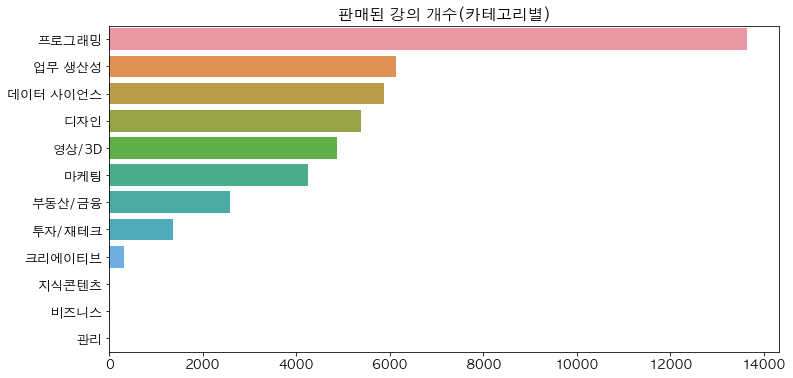

In [263]:
## 구매 완료된 강의의 카테고리별 개수
plt.figure(figsize=(12,6))
plt.rc("font", family="AppleGothic", size=13)

p1 = sns.countplot(data=pay,
             y=pay.category_title,
             order=pay.category_title.value_counts().index)
p1.set_title('판매된 강의 개수(카테고리별)')
p1.set_xlabel('')
p1.set_ylabel('')

plt.show()                 

**프로그래밍 카테고리**의 강의들이 가장 많이 판매된다.

## 프로그래밍 강의들은 가격이 낮아서 많이 판매?

In [173]:
avg = pay.groupby('category_title').mean()
sort = price.sort_values(by='sale_price',ascending=False)

In [174]:
sort[['sale_price']]

,sale_price
category_title,
크리에이티브,354084.639498
투자/재테크,258922.254974
지식콘텐츠,225909.090909
부동산/금융,199264.491064
데이터 사이언스,168066.015293
디자인,154224.155217
마케팅,151386.748408
관리,150000.000000
프로그래밍,142185.419355


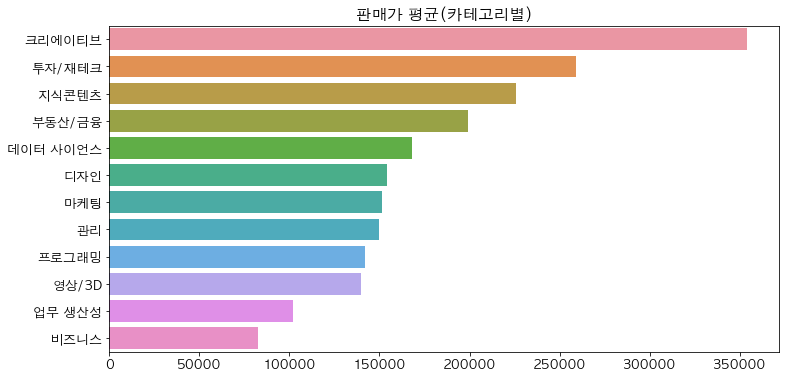

In [175]:
plt.figure(figsize=(12,6))
plt.rc("font", family="AppleGothic", size=13)

p1 = sns.barplot(data=sort,
           x=sort.sale_price,
           y=sort.index)
p1.set_title('판매가 평균(카테고리별)')
p1.set_xlabel('')
p1.set_ylabel('')

plt.show()

프로그래밍 카테고리의 강의들의 평균 판매가는 대체로 낮은 편이기 때문에 접근성이 높다고 볼 수 있다.  
판매 가격은 현재 상태를 유지하는 것이 좋은 전략이라고 생각한다.

## 쿠폰 할인 금액이 높으면 많이 판매?

In [176]:
sort = avg.sort_values(by='coupon_discount_amount', ascending=False)

In [177]:
sort[['coupon_discount_amount']]

,coupon_discount_amount
category_title,
투자/재테크,34471.702284
크리에이티브,30636.990596
데이터 사이언스,21995.220901
디자인,20652.187152
영상/3D,19050.246914
프로그래밍,18543.553152
부동산/금융,16943.929681
마케팅,14124.392832
업무 생산성,11120.301794


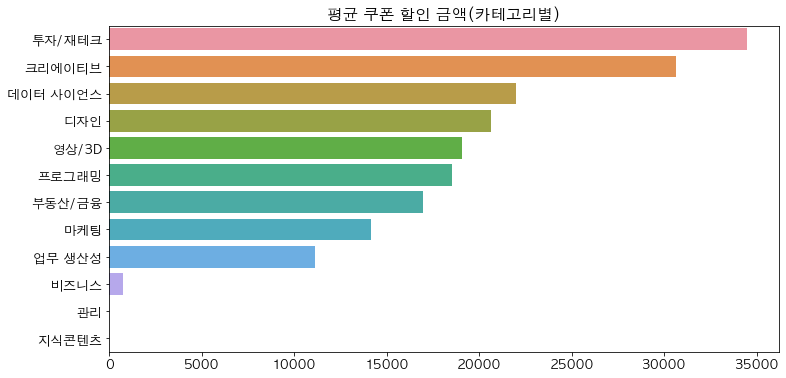

In [178]:
plt.figure(figsize=(12,6))
plt.rc("font", family="AppleGothic", size=13)

p1 = sns.barplot(data=sort,
           x=sort.coupon_discount_amount,
           y=sort.index)
p1.set_title('평균 쿠폰 할인 금액(카테고리별)')
p1.set_xlabel('')
p1.set_ylabel('')

plt.show()

프로그래밍 카테고리는 쿠폰 할인 금액의 평균이 높지 않음에도 많이 판매되므로 큰 관계가 있다고 보기는 어렵다.

## 프로그래밍 카테고리 내에서도 어떤 서브카테고리의 강의가 가장 많이 판매?

In [179]:
pg = pay.loc[pay.category_title=='프로그래밍']

In [ ]:
avg_sub = pg.groupby('subcategory_title').mean()
sort = avg_sub.sort_values(by='sale_price', ascending=False)

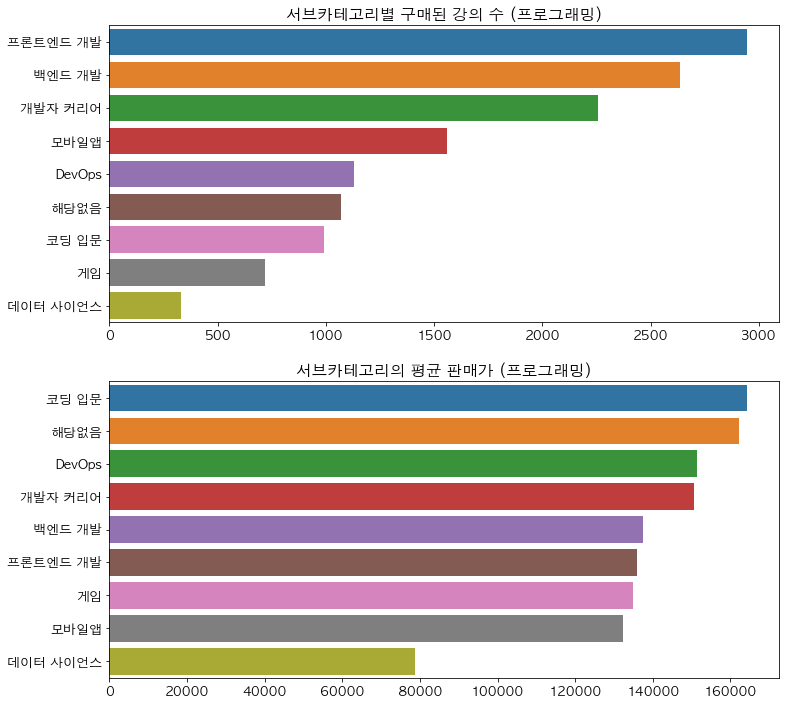

In [188]:
plt.figure(figsize=(12,12))
plt.rc("font", family="AppleGothic", size=13)

plt.subplot(2,1,1)
p1 = sns.countplot(data=pg,
             y=pg.subcategory_title,
             order=pg.subcategory_title.value_counts().index)
p1.set_title('서브카테고리별 구매된 강의 수 (프로그래밍)')
p1.set_xlabel('')
p1.set_ylabel('')

plt.subplot(2,1,2)
p2 = sns.barplot(data=sort,
           x=sort.sale_price,
           y=sort.index)
p2.set_title('서브카테고리의 평균 판매가 (프로그래밍)')
p2.set_xlabel('')
p2.set_ylabel('')

plt.show()

프로그래밍 강의 중에서도 **'프로트엔드 개발'** 강의가 가장 많이 판매된 것을 확인할 수 있음

**'데이터 사이언스'** 강의들이 평균적으로 가장 저렴하지만 판매량은 저조하다. 커리큘럼 특성상 쉽게 접근하기 어려운 내용이기 때문에 판매량이 저조하다고 생각된다.

**'코딩 입문'** 강의들은 입문자들이 접근하는 강의인만큼 가격적으로 부담이 덜해야 구매가 더 많이 이루어질 것이라고 생각한다.

## 가장 많이 환불되는 강의는?

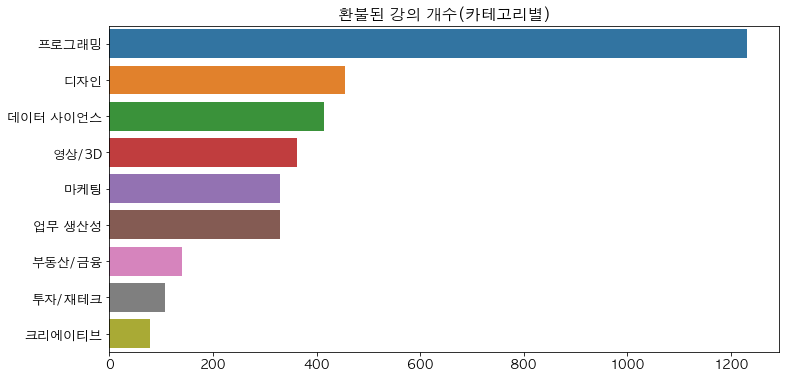

In [264]:
plt.figure(figsize=(12,6))
plt.rc("font", family="AppleGothic", size=13)

p1 = sns.countplot(data=ref,
             y=ref.category_title,
             order=ref.category_title.value_counts().index)
p1.set_title('환불된 강의 개수(카테고리별)')
p1.set_xlabel('')
p1.set_ylabel('')

plt.show()                 

## 프로그래밍 카테고리 내에서도 어떤 서브카테고리의 강의가 가장 많이 환불?

In [280]:
pg = ref.loc[ref.category_title=='프로그래밍']

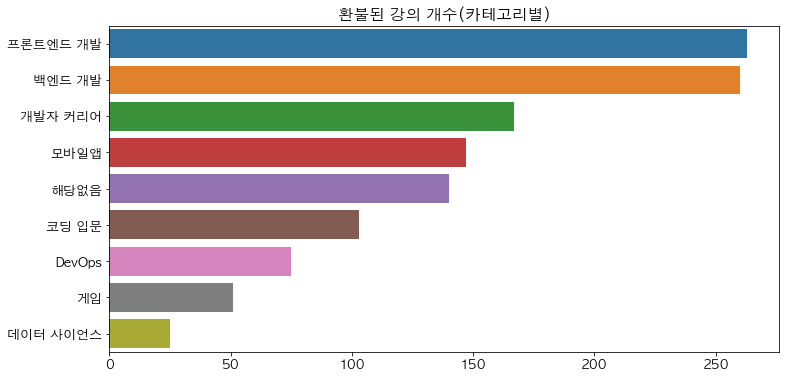

In [281]:
plt.figure(figsize=(12,6))
plt.rc("font", family="AppleGothic", size=13)

p1 = sns.countplot(data=pg,
             y=pg.subcategory_title,
             order=pg.subcategory_title.value_counts().index)
p1.set_title('환불된 강의 개수(카테고리별)')
p1.set_xlabel('')
p1.set_ylabel('')

plt.show()                 

In [266]:
sub = pg.loc[pg.subcategory_title=='프론트엔드 개발']

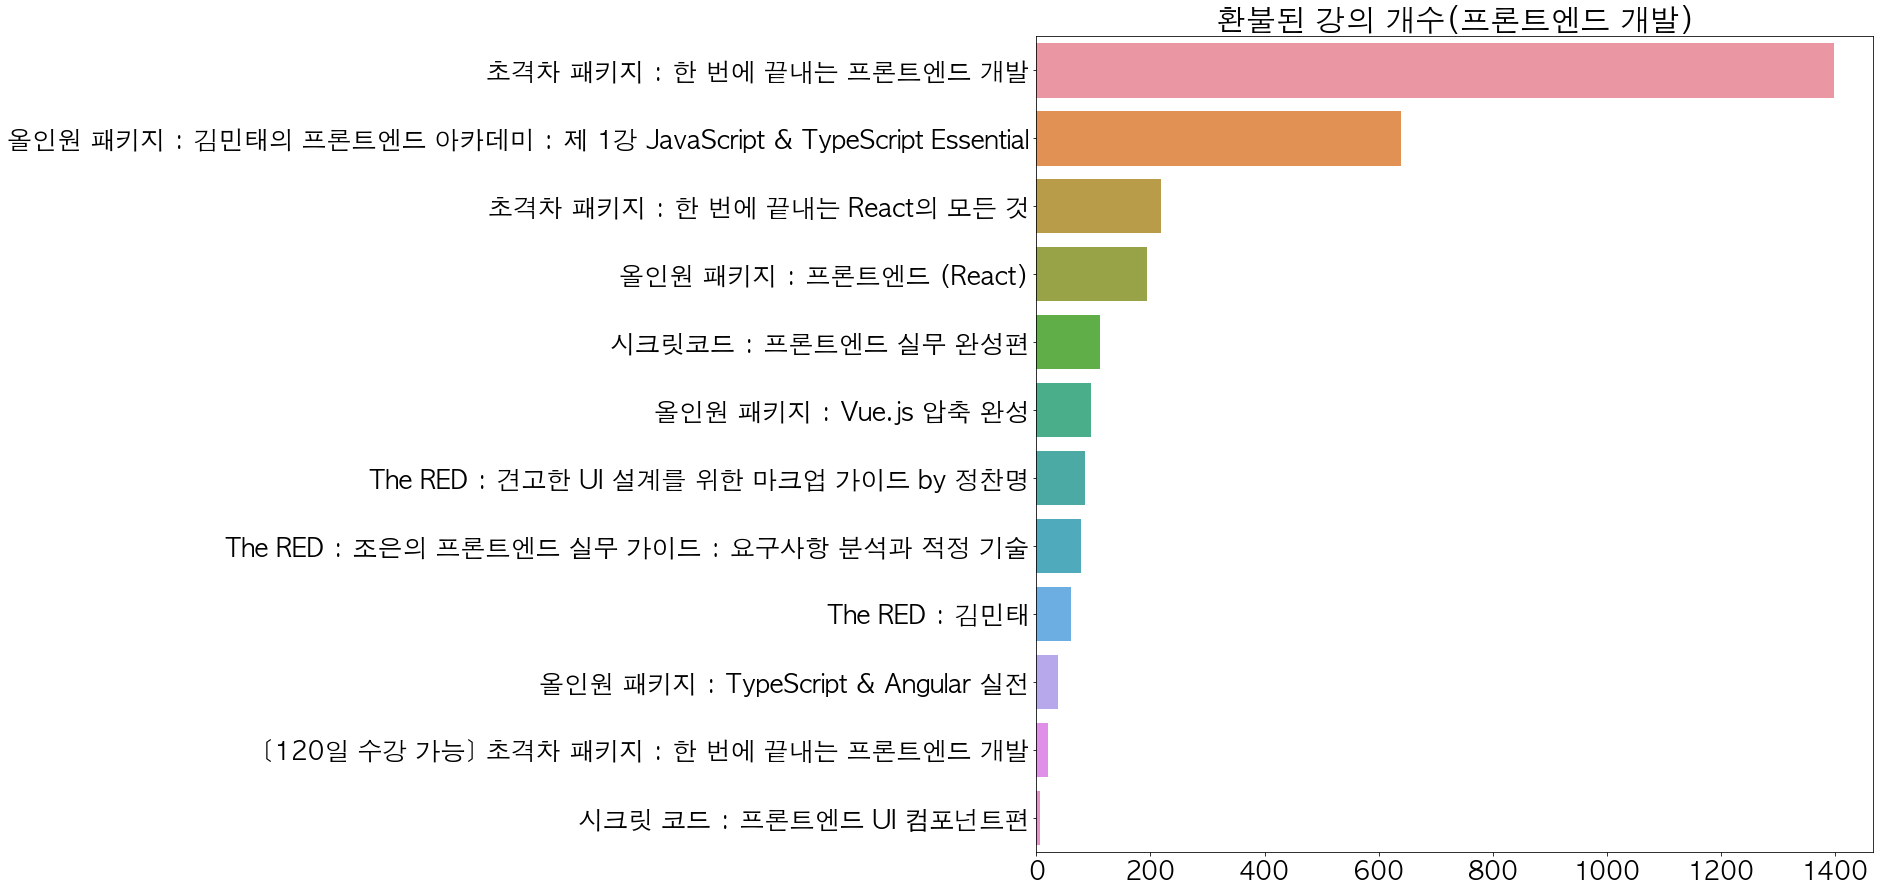

In [278]:
plt.figure(figsize=(15,15))
plt.rc("font", family="AppleGothic", size=25)

p1 = sns.countplot(data=sub,
             y=sub.course_title,
             order=sub.course_title.value_counts().index)
p1.set_title('환불된 강의 개수(프론트엔드 개발)')
p1.set_xlabel('')
p1.set_ylabel('')

plt.show()    

**'초격차 패키지 : 한 번에 끝내는 프론트엔드 개발'** 강의가 가장 환불이 많이 된 것을 확인함.  
커리큘럼 수정이나 강사의 교체를 논의해 볼 수 있음